In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm

### Notebook 2  - Capstone_ML-Final
#### Capstone Project
#### Halak Desai, April 2021

#### This notebook contains preprocessing data and running supervized machine learning models.

In [24]:
#read the csv from EDA
world_df = pd.read_csv('Created_Data\world_df2010.csv')
actor = pd.read_csv(r'Created_Data\actor.csv')
director = pd.read_csv('Created_Data\director.csv')
genre = pd.read_csv('Created_Data\genre.csv')

In [25]:
world_df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,actors,votes,published_month,published_day,weighted_average_vote,mean_vote,weighted_us_voters_rating,weighted_non_us_voters_rating,weighted_males_allages_rating,weighted_females_allages_rating
0,tt0069049,L'altra faccia del vento,The Other Side of the Wind,2018,2018-11-02,Drama,122,USA,Other,Orson Welles,"John Huston, Oja Kodar, Peter Bogdanovich, Sus...",5887,November,Friday,6.8,6.8,6.474287,6.414612,6.609705,6.042891
1,tt0100275,La Telenovela Errante,La Telenovela Errante,2017,2018-09-06,"Comedy, Drama, Fantasy",80,Other,Other,"Raoul Ruiz, Valeria Sarmiento","Luis Alarcón, Patricia Rivadeneira, Francisco ...",260,September,Thursday,6.6,6.6,5.917986,5.799475,5.921459,6.005447
2,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,2018-03-20,"Animation, Adventure, Comedy",83,Other,English,Anthony Harrison,"Anthony Harrison, C. Ernst Harth, Ellie Harvie...",264,March,Tuesday,8.8,8.9,6.312544,5.858175,6.163796,6.214925
3,tt0146592,Pál Adrienn,Pál Adrienn,2010,2011-03-17,Drama,136,Other,Other,Ágnes Kocsis,"Éva Gábor, István Znamenák, Ákos Horváth, Lia ...",470,March,Thursday,6.7,6.9,5.896524,5.968471,5.994856,6.070738
4,tt0162942,A zöld sárkány gyermekei,A zöld sárkány gyermekei,2010,2011-04-07,Drama,89,Other,Other,Bence Miklauzic,"Zoltán Rátóti, Yu Debin, Eszter Bánfalvi, Fere...",128,April,Thursday,6.8,7.1,5.902393,5.794009,5.891751,6.010284


In [26]:
#Check for duplicated rows
world_df.duplicated().sum()

0

In [27]:
#check the shape of the dataframe
world_df.shape

(29105, 20)

In [28]:
world_df.isnull().sum()

imdb_title_id                      0
title                              0
original_title                     0
year                               0
date_published                     0
genre                              0
duration                           0
country                            0
language                           0
director                           0
actors                             0
votes                              0
published_month                    0
published_day                      0
weighted_average_vote              0
mean_vote                          0
weighted_us_voters_rating          0
weighted_non_us_voters_rating      0
weighted_males_allages_rating      0
weighted_females_allages_rating    0
dtype: int64

In [29]:
world_df.dtypes

imdb_title_id                       object
title                               object
original_title                      object
year                                 int64
date_published                      object
genre                               object
duration                             int64
country                             object
language                            object
director                            object
actors                              object
votes                                int64
published_month                     object
published_day                       object
weighted_average_vote              float64
mean_vote                          float64
weighted_us_voters_rating          float64
weighted_non_us_voters_rating      float64
weighted_males_allages_rating      float64
weighted_females_allages_rating    float64
dtype: object

In [30]:
# Remove outlier which were found during EDA for duration of movies which are greater than 300
world_df[world_df['duration']> 300]

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,actors,votes,published_month,published_day,weighted_average_vote,mean_vote,weighted_us_voters_rating,weighted_non_us_voters_rating,weighted_males_allages_rating,weighted_females_allages_rating
1409,tt11617492,Orbius,Orbius,2020,2020-01-16,Fantasy,570,Other,Other,Sergey A.,"Sergey A., Random People",225,January,Thursday,9.3,9.5,5.917910,5.765260,5.951145,6.132046
1470,tt11777298,DAU. Degeneratsiya,DAU. Degeneratsiya,2020,2020-02-28,"Drama, Horror, Thriller",369,Other,Other,"Ilya Khrzhanovskiy, Ilya Permyakov","Vladimir Azhippo, Dmitry Kaledin, Olga Shkabar...",268,February,Friday,6.5,6.4,5.902956,5.811909,5.905268,6.012671
5171,tt1728616,Dau,Dau,2019,2019-01-24,"Biography, Drama, History",330,Other,Other,Ilya Khrzhanovskiy,"Teodor Currentzis, Youriy Alekseev, Radmila Sh...",114,January,Thursday,4.4,4.6,5.912488,5.625856,5.704494,6.006903
7136,tt1954470,Gangs of Wasseypur,Gangs of Wasseypur,2012,2012-06-22,"Action, Crime, Drama",321,Other,Other,Anurag Kashyap,"Manoj Bajpayee, Richa Chadha, Nawazuddin Siddi...",78524,June,Friday,8.2,8.4,6.960369,7.921432,8.155375,6.559036
7628,tt2028550,Siglo ng pagluluwal,Siglo ng pagluluwal,2011,2011-09-09,Drama,360,Other,Other,Lav Diaz,"Perry Dizon, Angel Aquino, Bart Guingona, Haze...",190,September,Friday,7.1,7.1,5.958915,5.815219,5.952880,6.037291
8936,tt2194569,"Florentina Hubaldo, CTE","Florentina Hubaldo, CTE",2012,2012-01-29,Drama,360,Other,Other,Lav Diaz,"Hazel Orencio, Kristine Kintana, Noel Sto. Dom...",160,January,Sunday,7.2,6.9,5.960976,5.826715,5.971391,6.026601
14208,tt3303310,From what is before,Mula sa kung ano ang noon,2014,2015-08-12,Drama,338,Other,Other,Lav Diaz,"Perry Dizon, Roeder Camanag, Hazel Orencio, Ka...",541,August,Wednesday,7.8,7.7,6.033708,6.190566,6.373466,6.069202
15128,tt3529612,River of Fundament,River of Fundament,2014,2014-02-12,Drama,319,USA,Other,Matthew Barney,"Dave Bald Eagle, Milford Graves, John Buffalo ...",167,February,Wednesday,7.0,7.2,5.977998,5.797653,5.929583,6.034749
19160,tt4780662,Happî awâ,Happî awâ,2015,2015-12-12,"Drama, Romance",317,Other,Other,Ryûsuke Hamaguchi,"Sachie Tanaka, Hazuki Kikuchi, Maiko Mihara, R...",974,December,Saturday,7.1,5.9,6.064318,6.205967,6.360590,6.081640
19344,tt4842296,Hele sa hiwagang hapis,Hele sa hiwagang hapis,2016,2016-03-26,"Adventure, Drama, Fantasy",485,Other,Other,Lav Diaz,"Piolo Pascual, John Lloyd Cruz, Hazel Orencio,...",251,March,Saturday,7.4,7.4,5.955899,5.894025,6.034812,6.036806


There are 39 movies with duration more than 300. Which are outliers as we have seen in our EDA and now we will get rid of these data points, as they will skew our regression.  
I can see that maority movies are made in other countries and dominated by Drama genre.

In [31]:
world_df = world_df.drop(world_df[world_df['duration']> 300].index).reset_index(drop = True)
world_df

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,actors,votes,published_month,published_day,weighted_average_vote,mean_vote,weighted_us_voters_rating,weighted_non_us_voters_rating,weighted_males_allages_rating,weighted_females_allages_rating
0,tt0069049,L'altra faccia del vento,The Other Side of the Wind,2018,2018-11-02,Drama,122,USA,Other,Orson Welles,"John Huston, Oja Kodar, Peter Bogdanovich, Sus...",5887,November,Friday,6.8,6.8,6.474287,6.414612,6.609705,6.042891
1,tt0100275,La Telenovela Errante,La Telenovela Errante,2017,2018-09-06,"Comedy, Drama, Fantasy",80,Other,Other,"Raoul Ruiz, Valeria Sarmiento","Luis Alarcón, Patricia Rivadeneira, Francisco ...",260,September,Thursday,6.6,6.6,5.917986,5.799475,5.921459,6.005447
2,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,2018-03-20,"Animation, Adventure, Comedy",83,Other,English,Anthony Harrison,"Anthony Harrison, C. Ernst Harth, Ellie Harvie...",264,March,Tuesday,8.8,8.9,6.312544,5.858175,6.163796,6.214925
3,tt0146592,Pál Adrienn,Pál Adrienn,2010,2011-03-17,Drama,136,Other,Other,Ágnes Kocsis,"Éva Gábor, István Znamenák, Ákos Horváth, Lia ...",470,March,Thursday,6.7,6.9,5.896524,5.968471,5.994856,6.070738
4,tt0162942,A zöld sárkány gyermekei,A zöld sárkány gyermekei,2010,2011-04-07,Drama,89,Other,Other,Bence Miklauzic,"Zoltán Rátóti, Yu Debin, Eszter Bánfalvi, Fere...",128,April,Thursday,6.8,7.1,5.902393,5.794009,5.891751,6.010284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29088,tt9906644,Manoharam,Manoharam,2019,2019-09-27,"Comedy, Drama",122,Other,Other,Anvar Sadik,"Vineeth Sreenivasan, Aparna Das, Basil Joseph,...",491,September,Friday,6.8,7.2,5.937198,5.815068,6.001784,6.010317
29089,tt9908390,Le lion,Le lion,2020,2020-01-29,Comedy,95,Other,Other,Ludovic Colbeau-Justin,"Dany Boon, Philippe Katerine, Anne Serra, Samu...",398,January,Wednesday,5.3,5.5,5.908611,5.629489,5.694633,6.000000
29090,tt9911196,De Beentjes van Sint-Hildegard,De Beentjes van Sint-Hildegard,2020,2020-02-13,"Comedy, Drama",103,Other,Other,Johan Nijenhuis,"Herman Finkers, Johanna ter Steege, Leonie ter...",724,February,Thursday,7.7,7.9,5.911550,6.259078,6.383569,6.157259
29091,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,2019-03-15,"Drama, Family",98,Other,Other,Ahmet Faik Akinci,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",194,March,Friday,6.4,9.4,5.879104,5.700498,5.773267,5.996008


### Next Steps Data Preprocessing

* I am going to drop the columns which are not necessary for my machine learning model.  

* I am going to take out imdb_title_id, title and year.  

* I am going to convert categorical columns into numeric by using OneHotEncoder and LabelEncoder method.  

* My target column is weighted_average_votes column.


In [32]:
# Drop few columns as they are not of purpose.
world_df.drop(['title','year'], axis = 1, inplace = True)

In [33]:
world_df.shape

(29093, 18)

In [34]:
85431-85392

39

In [35]:
world_df.head()

,imdb_title_id,original_title,date_published,genre,duration,country,language,director,actors,votes,published_month,published_day,weighted_average_vote,mean_vote,weighted_us_voters_rating,weighted_non_us_voters_rating,weighted_males_allages_rating,weighted_females_allages_rating
0,tt0069049,The Other Side of the Wind,2018-11-02,Drama,122,USA,Other,Orson Welles,"John Huston, Oja Kodar, Peter Bogdanovich, Sus...",5887,November,Friday,6.8,6.8,6.474287,6.414612,6.609705,6.042891
1,tt0100275,La Telenovela Errante,2018-09-06,"Comedy, Drama, Fantasy",80,Other,Other,"Raoul Ruiz, Valeria Sarmiento","Luis Alarcón, Patricia Rivadeneira, Francisco ...",260,September,Thursday,6.6,6.6,5.917986,5.799475,5.921459,6.005447
2,tt0137204,Joe Finds Grace,2018-03-20,"Animation, Adventure, Comedy",83,Other,English,Anthony Harrison,"Anthony Harrison, C. Ernst Harth, Ellie Harvie...",264,March,Tuesday,8.8,8.9,6.312544,5.858175,6.163796,6.214925
3,tt0146592,Pál Adrienn,2011-03-17,Drama,136,Other,Other,Ágnes Kocsis,"Éva Gábor, István Znamenák, Ákos Horváth, Lia ...",470,March,Thursday,6.7,6.9,5.896524,5.968471,5.994856,6.070738
4,tt0162942,A zöld sárkány gyermekei,2011-04-07,Drama,89,Other,Other,Bence Miklauzic,"Zoltán Rátóti, Yu Debin, Eszter Bánfalvi, Fere...",128,April,Thursday,6.8,7.1,5.902393,5.794009,5.891751,6.010284


### I am going to use actor csv which was created in EDA Notebook.
1. Movies with more than 5000 votes and from years 2010-2020
2. Number of movies for each actor and their mean average weighted votes/rating for all the movies they have acted in.

In [36]:
actor.head()

,actors,weighted_average_vote,weighted_us_voters_rating,weighted_non_us_voters_rating,year,movies
0,Samuel L. Jackson,6.468571,6.529398,6.381008,2014.885714,35
1,Akshay Kumar,6.100000,6.073354,5.911962,2014.500000,32
2,Bruce Willis,5.570000,5.855864,5.572304,2014.633333,30
3,James Franco,6.143333,6.247823,6.104468,2013.833333,30
4,Nicolas Cage,5.566667,5.791582,5.560384,2014.866667,30


In [37]:
rsort10 = actor.head(10)
rsort10

,actors,weighted_average_vote,weighted_us_voters_rating,weighted_non_us_voters_rating,year,movies
0,Samuel L. Jackson,6.468571,6.529398,6.381008,2014.885714,35
1,Akshay Kumar,6.100000,6.073354,5.911962,2014.500000,32
2,Bruce Willis,5.570000,5.855864,5.572304,2014.633333,30
3,James Franco,6.143333,6.247823,6.104468,2013.833333,30
4,Nicolas Cage,5.566667,5.791582,5.560384,2014.866667,30
5,Anna Kendrick,6.268966,6.366408,6.156123,2014.379310,29
6,Woody Harrelson,6.688000,6.657351,6.576840,2015.320000,25
7,J.K. Simmons,6.712000,6.608855,6.614690,2015.160000,25
8,Michael Peña,6.324000,6.369367,6.235646,2015.040000,25
9,Michael Shannon,6.512500,6.528347,6.406803,2014.333333,24


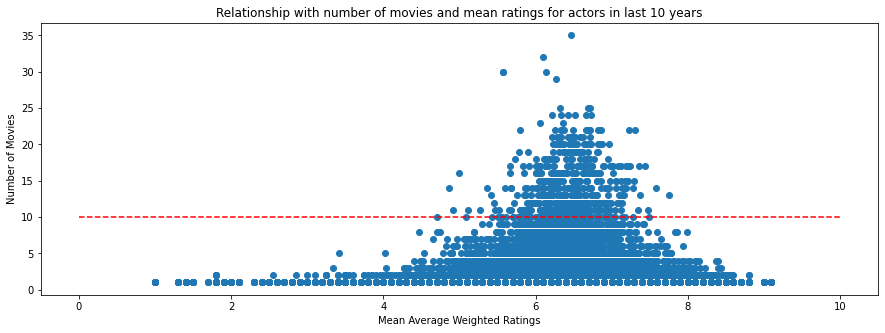

In [38]:
plt.figure(figsize = (15,5))
plt.scatter(x = actor['weighted_average_vote'], y = actor['movies'])
plt.ylabel('Number of Movies')
plt.xlabel('Mean Average Weighted Ratings')
plt.hlines(y = 10, xmin = 0, xmax = 10, linestyles = '--', color = 'red')
plt.title('Relationship with number of movies and mean ratings for actors in last 10 years')
plt.show()

Looking at the distribution, above I am going to keep my threshold for popular Actors as:
1. Acted atleast 15 movies since 2010 
2. Top 15 sorted by Ratings

In [39]:
Threshold_15 = actor[actor['movies'] > 15].sort_values(by = 'weighted_average_vote', ascending = False).head(15)
Threshold_15

,actors,weighted_average_vote,weighted_us_voters_rating,weighted_non_us_voters_rating,year,movies
122,Nawazuddin Siddiqui,7.435294,6.639966,7.090828,2015.058824,17
119,Mark Ruffalo,7.364706,7.313253,7.246809,2014.000000,17
17,Nassar,7.309091,6.396698,6.706760,2014.772727,22
113,Benedict Cumberbatch,7.235294,7.100949,7.113098,2014.529412,17
29,Scarlett Johansson,7.231818,7.273581,7.129008,2015.090909,22
103,Chris Evans,7.205882,7.256486,7.065389,2014.411765,17
120,Domhnall Gleeson,7.182353,7.155471,7.065277,2015.411765,17
129,Joy Badlani,7.117647,6.275544,6.468885,2015.529412,17
109,Prakash Raj,7.088235,6.268131,6.453453,2014.647059,17
114,Zoe Saldana,7.023529,6.962571,6.907922,2014.470588,17


In [40]:
world_df['popular_actor'] = world_df['actors'].apply(lambda x: 1 if (('Zoe Saldana' in x) or ('Domhnall Gleeson' in x) or ('Joseph Gordon-Levitt' in x) or ('Nawazuddin Siddiqui' in x) or
                                                                    ('Prakash Raj' in x) or('Mark Ruffalo' in x) or('Benedict Cumberbatch' in x) or('Joy Badlani' in x) or
                                                                    ('Adam Driver' in x) or('Chris Evans' in x) or('Nassar' in x) or('Stellan Skarsgård' in x) or
                                                                    ('Scarlett Johansson' in x) or('Irrfan Khan' in x) or('Jake Gyllenhaal' in x)) else 0)

In [41]:
world_df['popular_actor'].value_counts()

0    28561
1      532
Name: popular_actor, dtype: int64

## Now I am going to tackle Directors column in a similar value as Actors

### I am going to use director csv which was created in EDA Notebook.
1. Movies with more than 5000 votes and from years 2010-2020
2. Number of movies for each director and their mean average weighted votes/rating for all the movies they have directed.

In [42]:
director.head()

,director,weighted_average_vote,weighted_us_voters_rating,weighted_non_us_voters_rating,movies
0,Woody Allen,6.677778,6.532467,6.618365,9
1,Steven Soderbergh,6.550000,6.595534,6.478258,8
2,Tyler Perry,5.150000,5.312634,5.058735,8
3,Clint Eastwood,6.762500,6.763714,6.712668,8
4,Mike Flanagan,6.457143,6.567436,6.312455,7


In [43]:
rsortd10 = director.head(10)
rsortd10

,director,weighted_average_vote,weighted_us_voters_rating,weighted_non_us_voters_rating,movies
0,Woody Allen,6.677778,6.532467,6.618365,9
1,Steven Soderbergh,6.550000,6.595534,6.478258,8
2,Tyler Perry,5.150000,5.312634,5.058735,8
3,Clint Eastwood,6.762500,6.763714,6.712668,8
4,Mike Flanagan,6.457143,6.567436,6.312455,7
5,David Gordon Green,6.285714,6.302741,6.170002,7
6,Steven Spielberg,7.214286,7.217543,7.126373,7
7,Ridley Scott,6.585714,6.595230,6.535470,7
8,Luc Besson,6.385714,6.201681,6.280742,7
9,Paul Feig,6.483333,6.595464,6.335383,6


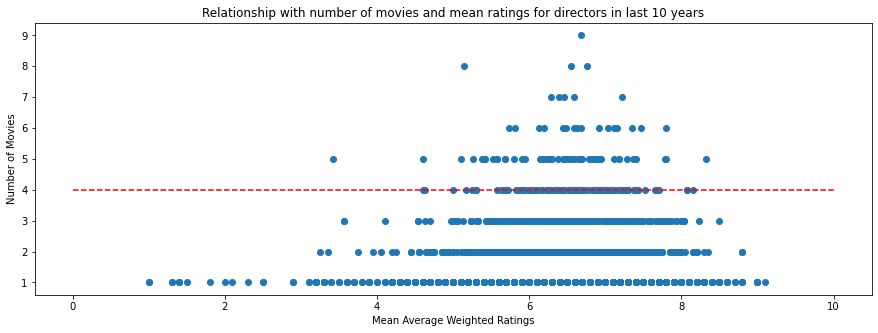

In [44]:
plt.figure(figsize = (15,5))
plt.scatter(x = director['weighted_average_vote'], y =director['movies'] )
plt.ylabel('Number of Movies')
plt.xlabel('Mean Average Weighted Ratings')
plt.hlines(y = 4, xmin = 0, xmax = 10, linestyles = '--', color = 'red')
plt.title('Relationship with number of movies and mean ratings for directors in last 10 years')
plt.show()

Looking at the distribution, above I am going to keep my threshold for popular directors as:
1. Directed atleast 5 movies since 2010 
2. Top 15 sorted by Ratings

Do some analysis on the outlier

In [45]:
Threshold_15d = director[director['movies'] > 5].sort_values(by = 'weighted_average_vote', ascending = False).head(15)
Threshold_15d

,director,weighted_average_vote,weighted_us_voters_rating,weighted_non_us_voters_rating,movies
20,Denis Villeneuve,7.800000,7.800664,7.718392,6
17,Hirokazu Koreeda,7.466667,6.804070,7.173733,6
12,Anurag Kashyap,7.350000,6.419496,6.982629,6
6,Steven Spielberg,7.214286,7.217543,7.126373,7
13,Richard Linklater,7.150000,7.175978,6.976106,6
22,A.R. Murugadoss,7.116667,6.383001,6.460053,6
24,James Wan,7.033333,7.048459,6.905501,6
10,Noah Baumbach,6.916667,6.929598,6.809621,6
3,Clint Eastwood,6.762500,6.763714,6.712668,8
23,Peter Berg,6.683333,6.714517,6.565812,6


In [46]:
world_df['popular_director'] = world_df['director'].apply(lambda x: 1 if (('Denis Villeneuve' in x) or ('Anurag Kashyap' in x) or ('Ridley Scott' in x) or ('Tim Burton' in x) or
                                                                    ('Lasse Hallström' in x) or('Woody Allen' in x) or('Hirokazu Koreeda' in x) or('Steven Soderbergh' in x) or
                                                                    ('James Wan' in x) or('Noah Baumbach' in x) or('Clint Eastwood' in x) or('Peter Berg' in x) or
                                                                    ('A.R. Murugadoss' in x) or('Richard Linklater' in x) or('Steven Spielberg' in x)) else 0)

In [47]:
world_df['popular_director'].value_counts()

0    28989
1      104
Name: popular_director, dtype: int64

## I am going to tackle Genres

### I am going to use genre csv which was created in EDA Notebook.
1. Movies with more than 5000 votes and from years 2010-2020
2. Number of movies for each genre and their mean average weighted votes/rating for all the movies in each genre.

In [48]:
genre.head()

,genres,weighted_average_vote,weighted_us_voters_rating,weighted_non_us_voters_rating,weighted_females_allages_rating,weighted_males_allages_rating,movies
0,Drama,6.631439,6.407047,6.454747,6.539069,6.507771,2516
1,Comedy,6.302748,6.214126,6.177746,6.354748,6.212719,1419
2,Action,6.297783,6.223895,6.140751,6.318069,6.221802,1173
3,Thriller,6.171412,6.119637,6.051882,6.176575,6.118963,843
4,Crime,6.444596,6.292612,6.303492,6.359218,6.373112,731


In [49]:
rsortg_10 = genre.head(10)
rsortg_10

,genres,weighted_average_vote,weighted_us_voters_rating,weighted_non_us_voters_rating,weighted_females_allages_rating,weighted_males_allages_rating,movies
0,Drama,6.631439,6.407047,6.454747,6.539069,6.507771,2516
1,Comedy,6.302748,6.214126,6.177746,6.354748,6.212719,1419
2,Action,6.297783,6.223895,6.140751,6.318069,6.221802,1173
3,Thriller,6.171412,6.119637,6.051882,6.176575,6.118963,843
4,Crime,6.444596,6.292612,6.303492,6.359218,6.373112,731
5,Adventure,6.397455,6.342325,6.295057,6.544145,6.326942,668
6,Romance,6.427074,6.262968,6.278893,6.442515,6.284981,639
7,Horror,5.721993,5.904340,5.660628,5.895365,5.723001,582
8,Mystery,6.136712,6.109880,6.029745,6.165867,6.091544,444
9,Biography,6.904507,6.645251,6.723607,6.824866,6.772478,355


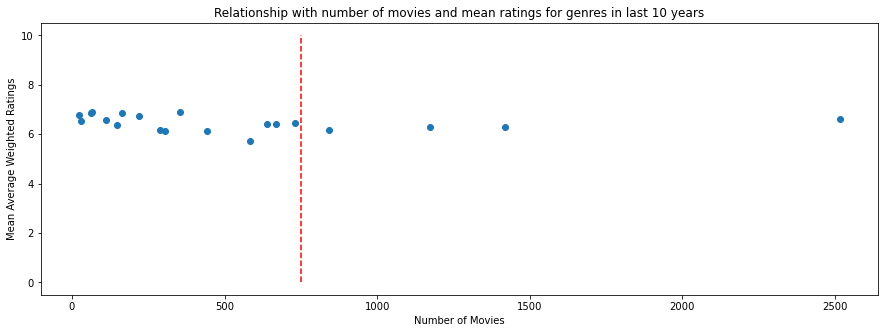

In [50]:
plt.figure(figsize = (15,5))
plt.scatter(x = genre['movies'], y = genre['weighted_average_vote'])
plt.xlabel('Number of Movies')
plt.ylabel('Mean Average Weighted Ratings')
plt.vlines(x = 750,ymin = 0, ymax = 10, linestyles = '--', color = 'red')
plt.title('Relationship with number of movies and mean ratings for genres in last 10 years')
plt.show()

Looking at the distribution, above I am going to keep my threshold for popular genres as:
1. Top 4 genres



**I am going to keep first 4 genres and rename others as other genres.**

In [51]:
Threshold_15g = genre[genre['movies'] > 750].sort_values(by = 'weighted_average_vote', ascending = False).head(15)
Threshold_15g

,genres,weighted_average_vote,weighted_us_voters_rating,weighted_non_us_voters_rating,weighted_females_allages_rating,weighted_males_allages_rating,movies
0,Drama,6.631439,6.407047,6.454747,6.539069,6.507771,2516
1,Comedy,6.302748,6.214126,6.177746,6.354748,6.212719,1419
2,Action,6.297783,6.223895,6.140751,6.318069,6.221802,1173
3,Thriller,6.171412,6.119637,6.051882,6.176575,6.118963,843


In [52]:
world_df.head(2)

,imdb_title_id,original_title,date_published,genre,duration,country,language,director,actors,votes,published_month,published_day,weighted_average_vote,mean_vote,weighted_us_voters_rating,weighted_non_us_voters_rating,weighted_males_allages_rating,weighted_females_allages_rating,popular_actor,popular_director
0,tt0069049,The Other Side of the Wind,2018-11-02,Drama,122,USA,Other,Orson Welles,"John Huston, Oja Kodar, Peter Bogdanovich, Sus...",5887,November,Friday,6.8,6.8,6.474287,6.414612,6.609705,6.042891,0,0
1,tt0100275,La Telenovela Errante,2018-09-06,"Comedy, Drama, Fantasy",80,Other,Other,"Raoul Ruiz, Valeria Sarmiento","Luis Alarcón, Patricia Rivadeneira, Francisco ...",260,September,Thursday,6.6,6.6,5.917986,5.799475,5.921459,6.005447,0,0


In [53]:
world_df['popular_genre'] = world_df['genre'].apply(lambda x: 1 if (('Drama' in x) or ('Comedy' in x) or ('Action' in x) or ('Thriller' in x)) else 0)

In [54]:
world_df['popular_genre'].value_counts()

1    26295
0     2798
Name: popular_genre, dtype: int64

### Get Dummy Variables  -  Country

####  I am going to use dummy variables for categorical columns `Country`, `Language`, `Published_Month` and `Published_Day`
#### At the end of this transformation I will have a datframe with all Numerical Values

In [55]:
Country_Name = pd.DataFrame(world_df['country'])

Country_Name = pd.get_dummies(Country_Name, drop_first = True) 
# drop 1st column to reduce duplication of information as it is a binary value

In [56]:
Country_Name.head()

,country_USA
0,1
1,0
2,0
3,0
4,0


In [57]:
Language_Name = pd.DataFrame(world_df['language'])

Language_Name = pd.get_dummies(Language_Name, drop_first = True)
# drop 1st column to reduce duplication of information as it is a binary value

In [58]:
Language_Name.head()

,language_Other
0,1
1,1
2,0
3,1
4,1


In [59]:
Month_Name = pd.DataFrame(world_df['published_month'])

Month_Name = pd.get_dummies(Month_Name, drop_first = True)
# drop 1st column to reduce duplication of information as it is a binary value

In [60]:
Month_Name.head()

,published_month_August,published_month_December,published_month_February,published_month_January,published_month_July,published_month_June,published_month_March,published_month_May,published_month_November,published_month_October,published_month_September
0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [61]:
Day_Name = pd.DataFrame(world_df['published_day'])

Day_Name = pd.get_dummies(Day_Name, drop_first = True)
# drop 1st column to reduce duplication of information as it is a binary value

In [62]:
Day_Name.head()

,published_day_Monday,published_day_Saturday,published_day_Sunday,published_day_Thursday,published_day_Tuesday,published_day_Wednesday
0,0,0,0,0,0,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0


In [63]:
# Concat all the dataframes back into the original dataframe

world_df_new = pd.concat([Language_Name, Country_Name, world_df, Month_Name, Day_Name], axis = 1)
world_df_new.head()

,language_Other,country_USA,imdb_title_id,original_title,date_published,genre,duration,country,language,director,...,published_month_May,published_month_November,published_month_October,published_month_September,published_day_Monday,published_day_Saturday,published_day_Sunday,published_day_Thursday,published_day_Tuesday,published_day_Wednesday
0,1,1,tt0069049,The Other Side of the Wind,2018-11-02,Drama,122,USA,Other,Orson Welles,...,0,1,0,0,0,0,0,0,0,0
1,1,0,tt0100275,La Telenovela Errante,2018-09-06,"Comedy, Drama, Fantasy",80,Other,Other,"Raoul Ruiz, Valeria Sarmiento",...,0,0,0,1,0,0,0,1,0,0
2,0,0,tt0137204,Joe Finds Grace,2018-03-20,"Animation, Adventure, Comedy",83,Other,English,Anthony Harrison,...,0,0,0,0,0,0,0,0,1,0
3,1,0,tt0146592,Pál Adrienn,2011-03-17,Drama,136,Other,Other,Ágnes Kocsis,...,0,0,0,0,0,0,0,1,0,0
4,1,0,tt0162942,A zöld sárkány gyermekei,2011-04-07,Drama,89,Other,Other,Bence Miklauzic,...,0,0,0,0,0,0,0,1,0,0


In [64]:
# I am going to make 3 buckets for the duration

world_df_new['duration_0_60'] = np.where(world_df_new['duration']< 61, 1, 0)
world_df_new['duration_between_60_90'] = np.where((world_df_new['duration']> 60) & (world_df_new['duration']< 91) , 1, 0)
world_df_new['duration_more_90'] = np.where(world_df_new['duration']> 90 ,1, 0)

In [65]:
world_df_new

,language_Other,country_USA,imdb_title_id,original_title,date_published,genre,duration,country,language,director,...,published_month_September,published_day_Monday,published_day_Saturday,published_day_Sunday,published_day_Thursday,published_day_Tuesday,published_day_Wednesday,duration_0_60,duration_between_60_90,duration_more_90
0,1,1,tt0069049,The Other Side of the Wind,2018-11-02,Drama,122,USA,Other,Orson Welles,...,0,0,0,0,0,0,0,0,0,1
1,1,0,tt0100275,La Telenovela Errante,2018-09-06,"Comedy, Drama, Fantasy",80,Other,Other,"Raoul Ruiz, Valeria Sarmiento",...,1,0,0,0,1,0,0,0,1,0
2,0,0,tt0137204,Joe Finds Grace,2018-03-20,"Animation, Adventure, Comedy",83,Other,English,Anthony Harrison,...,0,0,0,0,0,1,0,0,1,0
3,1,0,tt0146592,Pál Adrienn,2011-03-17,Drama,136,Other,Other,Ágnes Kocsis,...,0,0,0,0,1,0,0,0,0,1
4,1,0,tt0162942,A zöld sárkány gyermekei,2011-04-07,Drama,89,Other,Other,Bence Miklauzic,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29088,1,0,tt9906644,Manoharam,2019-09-27,"Comedy, Drama",122,Other,Other,Anvar Sadik,...,1,0,0,0,0,0,0,0,0,1
29089,1,0,tt9908390,Le lion,2020-01-29,Comedy,95,Other,Other,Ludovic Colbeau-Justin,...,0,0,0,0,0,0,1,0,0,1
29090,1,0,tt9911196,De Beentjes van Sint-Hildegard,2020-02-13,"Comedy, Drama",103,Other,Other,Johan Nijenhuis,...,0,0,0,0,1,0,0,0,0,1
29091,1,0,tt9914286,Sokagin Çocuklari,2019-03-15,"Drama, Family",98,Other,Other,Ahmet Faik Akinci,...,0,0,0,0,0,0,0,0,0,1


In [66]:
# drop duplicate columns

world_df_new.drop(['imdb_title_id','original_title','date_published','published_month','published_day','genre','country','language','director','actors','duration'], axis = 1, inplace = True)

In [67]:
# Final dataframe with all Numerical values ready for modeling!

world_df_new.head()

,language_Other,country_USA,votes,weighted_average_vote,mean_vote,weighted_us_voters_rating,weighted_non_us_voters_rating,weighted_males_allages_rating,weighted_females_allages_rating,popular_actor,...,published_month_September,published_day_Monday,published_day_Saturday,published_day_Sunday,published_day_Thursday,published_day_Tuesday,published_day_Wednesday,duration_0_60,duration_between_60_90,duration_more_90
0,1,1,5887,6.8,6.8,6.474287,6.414612,6.609705,6.042891,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,260,6.6,6.6,5.917986,5.799475,5.921459,6.005447,0,...,1,0,0,0,1,0,0,0,1,0
2,0,0,264,8.8,8.9,6.312544,5.858175,6.163796,6.214925,0,...,0,0,0,0,0,1,0,0,1,0
3,1,0,470,6.7,6.9,5.896524,5.968471,5.994856,6.070738,0,...,0,0,0,0,1,0,0,0,0,1
4,1,0,128,6.8,7.1,5.902393,5.794009,5.891751,6.010284,0,...,0,0,0,0,1,0,0,0,1,0


**I am going to convert our target value into 2 classes:**
1. Good Rating - weighted_average_vote greater than or equal to 7
2. Poor Rating - weighted_average_vote less than 7

In [68]:
# Mapping our target value to be converted into 2 class classification

world_df_new['weighted_average_vote'] = np.where(world_df_new['weighted_average_vote']< 7, 0, 1)

In [69]:
# establish X and y for models

X = world_df_new.drop(['weighted_average_vote'], axis = 1)
y = world_df_new['weighted_average_vote']

In [70]:
y

0        0
1        0
2        1
3        0
4        0
        ..
29088    0
29089    0
29090    1
29091    0
29092    0
Name: weighted_average_vote, Length: 29093, dtype: int32

<AxesSubplot:ylabel='Frequency'>

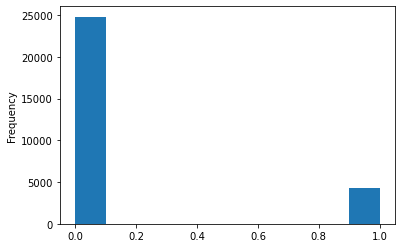

In [71]:
# Plot to see imbalance

world_df_new['weighted_average_vote'].plot(kind = 'hist', x='weighted_average_vote' , xlabel = 'Class 0 and Class 1')

In [72]:
# % imbalance

world_df_new['weighted_average_vote'].value_counts()/world_df_new['weighted_average_vote'].shape[0]*100

0    85.243873
1    14.756127
Name: weighted_average_vote, dtype: float64

There is an imbalance. When we have an imbalance data, Machine Learning algorithms tend to produce unsatisfactory classifiers when faced with such datasets.
As we are dealing with a classification problem, this problem has to be addressed before fitting any model. Few approaches we can take are undersampling, oversampling, using confusion matrix to analyse recall and precision scores. We will note this for now for later

I want to see my features and target correlation matrix.  

Hence, I am going to use corr() method and plot a heat map using Seaborn library

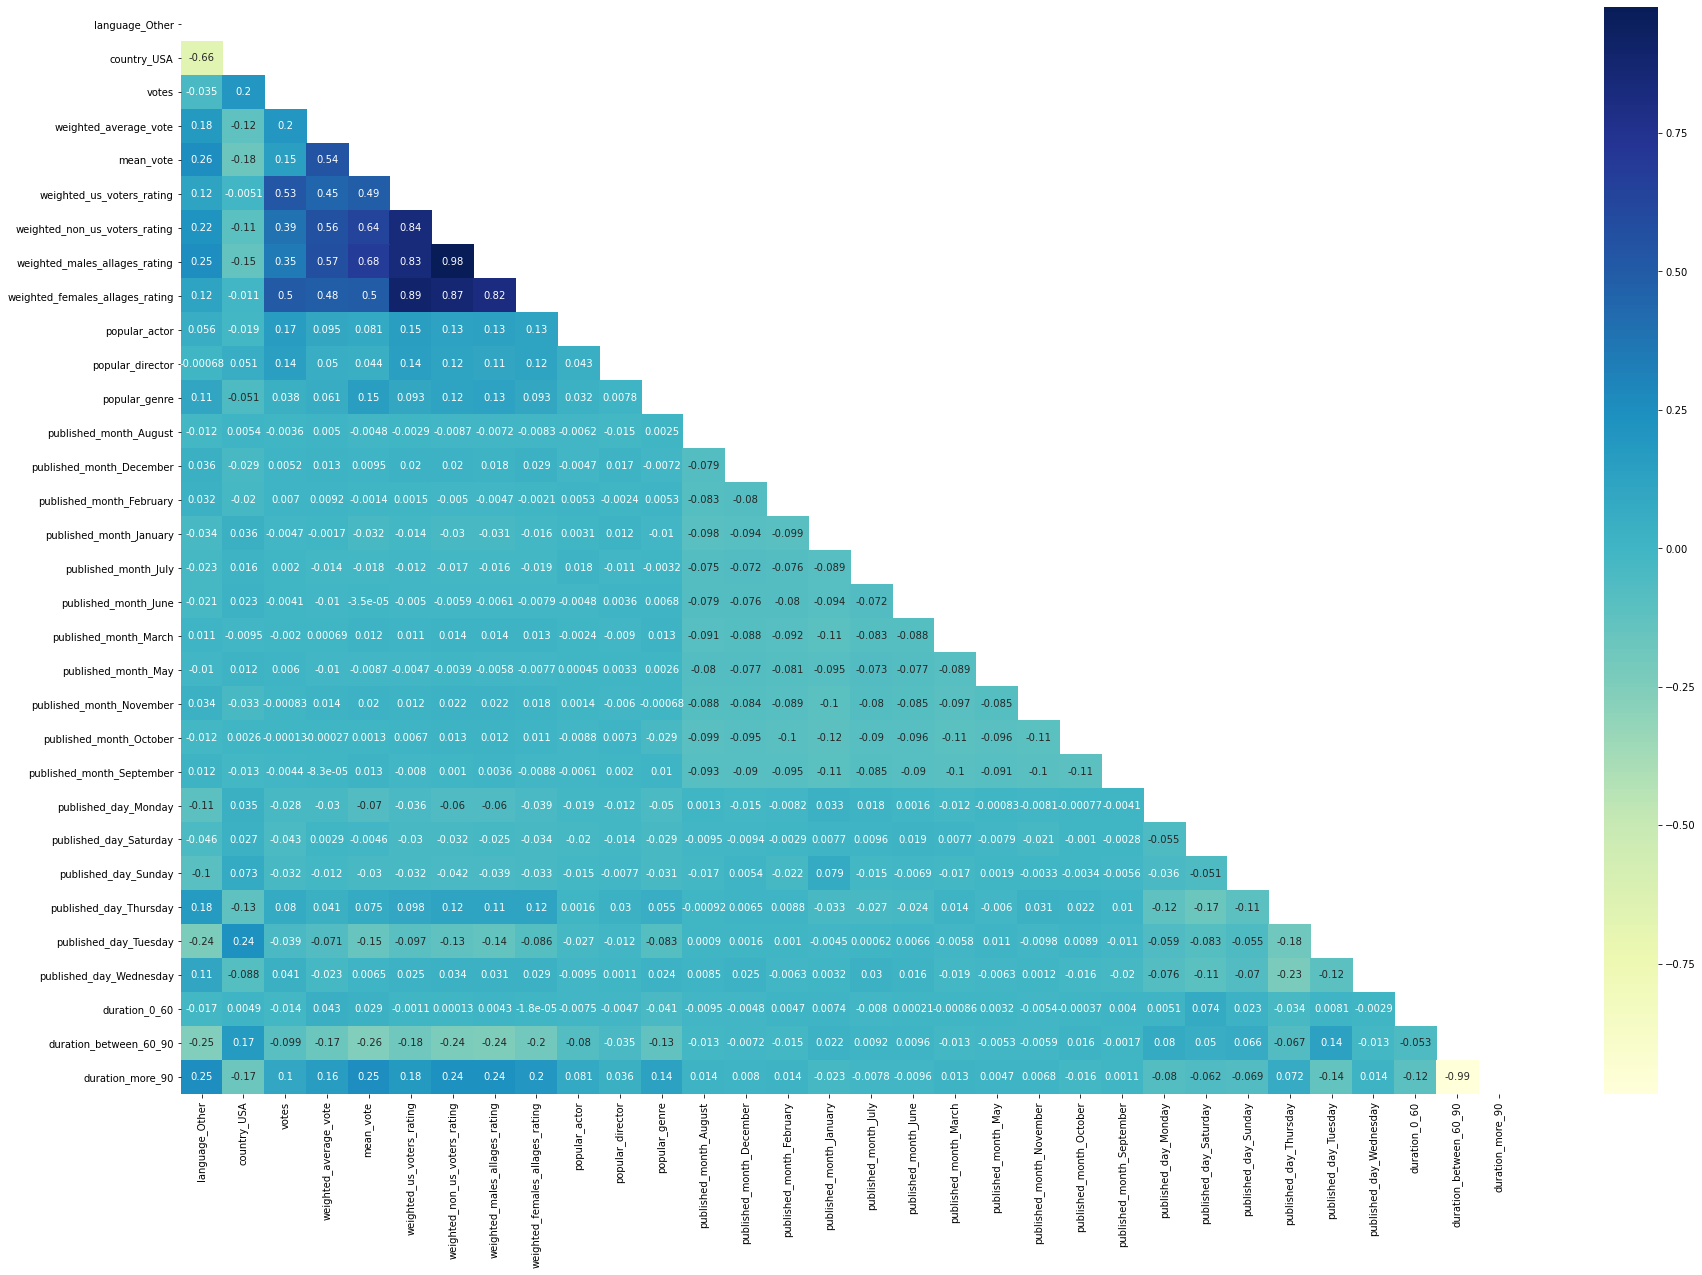

In [73]:
plt.figure(figsize =(30,20))
matrix = np.triu(world_df_new.corr())
sns.heatmap(world_df_new.corr(), annot = True, mask =matrix, cmap ='YlGnBu')
plt.show()

Correlation refers to an increase/decrease in a dependent variable with an increase/decrease in an independent variable.

So here we can say that 0 is no correlation at all.

 * 0.3 - positive weak correlation
 * 0.5 - positive moderate correlation
 * 0.8 - fairly positive strong correaltion
 * 1.0 - perfect positive correlation

 * -0.3 - negative weak correlation
 * -0.5 - negative moderate correlation
 * -0.8 - fairly negative strong correaltion
 * -1.0 - perfect negative correlation  

**Correlation is not the reason of causality.**

This is a large matrix. But I can straight away see that there is moderate correlation between features related to weighted ratings of different demographics with our target variable weighted_average_vote.

### Logistic Regression

Let us first back up a little and go over what does Logistic Regression means for my problem:

Logistic model is used to model the probability of a certain class or an outcome. In our case, it is if a movie will have a poor rating (rating below 7) or good rating( rating above 7).


- **Null Hypothesis - Movie Ratings (good or bad) are independent of other features/variables**
- **Alternate Hypothesis - Movie Ratings (good or bad) are dependent of other features/variables**

### Prepartion for a Logistic Stats Model

As per the information from correlation matrix, I am going to drop all weighted votes or ratings columns.  
After few iterations by using VIF, P- Values and insights gained from EDA, I have decided to keep below columns to run my final Logistic Regression:
- popular_actor               
- popular_director            
- popular_genre               
- published_month_December    
- published_day_Wednesday     
- duration_more_90 

In [74]:
## Establish X1 - Features and y1 - Target values

X1 = world_df_new.drop(['weighted_average_vote','weighted_non_us_voters_rating','votes','mean_vote','language_Other','published_day_Sunday','published_day_Saturday','duration_between_60_90',
                       'weighted_males_allages_rating','weighted_females_allages_rating','published_month_March','duration_0_60','weighted_us_voters_rating',
                       'published_month_January','published_month_October','published_month_February','published_month_July','published_month_August','published_month_May','published_month_June','published_month_September',
                       'published_day_Monday','published_day_Tuesday','published_day_Thursday','published_month_November','country_USA','votes'], axis = 1)
                   
                      
y1 = world_df_new['weighted_average_vote']

In [75]:
y1.value_counts()

0    24800
1     4293
Name: weighted_average_vote, dtype: int64

In [239]:
X1.shape

(29093, 6)

### VIF

Collinearity is a linear relationship between two or more independent variables. 

What is VIF = Variance Inflation Factor (source:https://www.statisticshowto.com/variance-inflation-factor/)

A variance inflation factor(VIF) detects collinearty/multicollinearity in a regression analysis.  As we know collinearity is when there’s correlation between predictors (i.e. Features) in a model. It’s presence can adversely affect your regression results. The VIF estimates how much the variance of a regression coefficient is inflated due to multicollinearity in the model.

Higher the VIF more presence of collinearity expressed by that feature, which could skew your regression results in either direction.

Values of VIF that exceed 10 are often regarded as indicating collinearity.

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
# Calculate VIF and convert into series

VIF = pd.Series([variance_inflation_factor(X1.values, i) 
               for i in range(X1.shape[1])], 
              index=X1.columns)

In [57]:
VIF # less than 10

popular_actor               1.027544
popular_director            1.006845
popular_genre               3.038627
published_month_December    1.070117
published_day_Wednesday     1.140574
duration_more_90            2.927153
dtype: float64

In [58]:
# Add a constant

X1_withconstant = sm.add_constant(X1)

In [59]:
# 1. Instantiate model

mylogreg_votes= sm.Logit(y1,X1_withconstant)

# 2. Fit model
mylogreg_votes_results = mylogreg_votes.fit()

# 3. summary
mylogreg_votes_results.summary()

Optimization terminated successfully.
         Current function value: 0.399537
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                            
=================================================================================
Dep. Variable:     weighted_average_vote   No. Observations:                29093
Model:                             Logit   Df Residuals:                    29086
Method:                              MLE   Df Model:                            6
Date:                   Sat, 10 Apr 2021   Pseudo R-squ.:                 0.04521
Time:                           17:26:33   Log-Likelihood:                -11624.
converged:                          True   LL-Null:                       -12174.
Covariance Type:               nonrobust   LLR p-value:                1.409e-234
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -3.1185      0.078    -39.984      0.000      -3.271      -2.966
popular_actor                1.0811      0.091     11.819      0.000       0.902       1.260
popular_director             1.1930      0.203      5.889      0.000       0.796       1.590
popular_genre                0.5145      0.073      7.082      0.000       0.372       0.657
published_month_December     0.1379      0.063      2.183      0.029       0.014       0.262
published_day_Wednesday     -0.2353      0.053     -4.428      0.000      -0.339      -0.131
duration_more_90             1.1344      0.047     24.327      0.000       1.043       1.226
============================================================================================
"""

In [60]:
# List of all Co-Efficients

P = mylogreg_votes_results.params
P

const                      -3.118543
popular_actor               1.081067
popular_director            1.193028
popular_genre               0.514536
published_month_December    0.137872
published_day_Wednesday    -0.235330
duration_more_90            1.134387
dtype: float64

<AxesSubplot:title={'center':'Features vs Co-efficients'}, xlabel='Features', ylabel='Co-Efficients'>

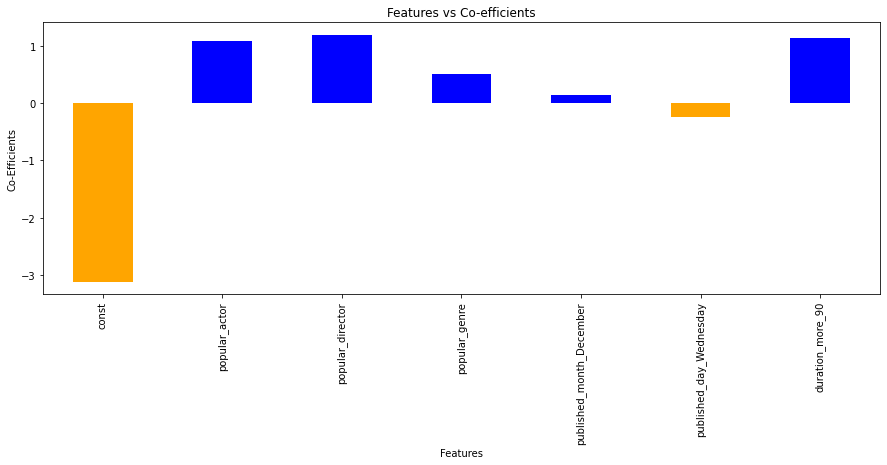

In [61]:
P.plot(kind = 'bar', xlabel = 'Features', ylabel = 'Co-Efficients', title = 'Features vs Co-efficients', figsize=(15,5), color=["orange", "blue", "blue", "blue", "blue", "orange","blue"])

### What do these Coefficients mean?

The result of this regression is co-efficients, which we in turn convert to odds ratio.

$$\text{odds ratio} = e^{beta} $$

Popular actor, director, genre, movie released in month of December and duration of movie more than 90 mins are positive indicators.  

Our constant and movie released or published on Wednesday are negative indicators.


In [62]:
np.exp(P)

const                       0.044222
popular_actor               2.947822
popular_director            3.297049
popular_genre               1.672862
published_month_December    1.147828
published_day_Wednesday     0.790310
duration_more_90            3.109267
dtype: float64

- odds for constant decreases by (1/0.044222) = 22.613 as co-efficient is negative  

- odds for published_day_Wednesday (1/0.790310) = 1.265 as co-efficent is negative

**So what these numbers mean:**

1. odds of getting a good rating if none of the features influence the prediction of rating is decreased by a factor of 22.613. This is not realistic in our case as features are significant in predicting movie ratings with p-value less than 0.05. Hence we can safely reject null hypothesis.


2. if a popular actor casted in the movie the odds of getting a good rating are increased by a factor of 2.947.
3. if a popular director is directing the movie the odds of getting a good rating are increased by a factor of 3.297.
4. if a movie is made in a popular genre the odds of getting a good rating are increased by a factor of 1.672.
5. if a movie is released in December the odds of getting a good rating are increased by a factor of 1.147.
6. if a movie is made for duration longer than 90 mins the odds of getting a good rating are increased by a factor of 3.109.
7. if a movie is released on Wednesday the odds of getting a good rating are decreased by a factor of 1.265.

<AxesSubplot:title={'center':'Features'}, xlabel='Features', ylabel='Odds of being a Good Rating'>

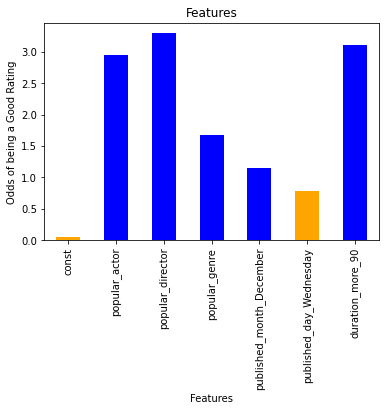

In [63]:
# let us see these number in a plot to visualy see its impact.

np.exp(P).plot(kind = 'bar', xlabel = 'Features', ylabel = 'Odds of being a Good Rating', title = 'Features',color=["orange", "blue", "blue", "blue", "blue", "orange","blue"])


## Prediction Model  using Supervised Machine Learning

**Now that I have established which factors are important to predict a movie rating, I m going to use Supervised Machine Learning to build a model to predict if a movie will get a good rating (more than or equal to 7) or a bad/poor rating (less than 7)**

### Let us divide the dataset.

I have very large dataset with approximately 29000 rows and have about 6 features.  

I am going to split it into Train set and Validation set.  

I am going to use GridSearchCV to optimize hyperparameters. Hence I donot need to split my data into remainder and test.  

My validation set will be pristine and not be touched until needed for testing my trained model.

In [64]:
# Splitting the data to train and validation sets.
# using Stratify to keep imbalance data represented for my model training
# random state selected as want to keep results reproducible


X_train, X_validation, y_train, y_validation = train_test_split(X1, y1, test_size=0.3, stratify = y1, random_state = 1)

In [65]:
X_train.shape

(20365, 6)

In [66]:
y_train.shape

(20365,)

In [67]:
X_validation.shape

(8728, 6)

In [68]:
y_validation.shape

(8728,)

In [69]:
y_validation.value_counts()

0    7440
1    1288
Name: weighted_average_vote, dtype: int64

### Logistic Regression and Decision Tree without Optimizing Hyperparameter

I am going to run basic model without adjusting any parameters and see what kind of accuracies will we get to start.

In [70]:
#LogisticRegression

logit = LogisticRegression(max_iter=3000) # Instantiate the model

my_logit = logit.fit(X_train,y_train) # fit the model to train set

print(f' logistic regression Train: {my_logit.score(X_train,y_train)}') # Score the model for accuracy of train set
print(f' logistic regression Validation: {my_logit.score(X_validation,y_validation)}') # Score the model for accuracy of validation set


 logistic regression Train: 0.8525902283329241
 logistic regression Validation: 0.8526581118240146


I can see that the train and validation sets have high accuracy without using any hyperparameters.   
This make me suspicious of overfitting.  
I also expect this result because my model is favouring majority class

In [71]:
#Decision Tree

# Instantiate 
DT_model = DecisionTreeClassifier()

# fit the DT
DT_model.fit(X_train, y_train)

print(f' Decision Tree Train: {DT_model.score(X_train,y_train)}') # Score the model for accuracy of train set
print(f' Decision Tree Validation: {DT_model.score(X_validation,y_validation)}') # Score the model for accuracy of validation set

 Decision Tree Train: 0.8528357476061871
 Decision Tree Validation: 0.8520852428964253


I can see that the train and validation sets have high accuracy without using any hyperparameters.   
This make me suspicious of overfitting.  
I also expect this result because my model is favouring majority class

### Set-Up Pipeline and GridSearchCV for optimizing Hyperparameters

**Now I am going to create ML pipeline and GridSearchCV to optimize hyperparameters and find best model with best hyperparameter** 

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

**Principal component analysis (PCA).**

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.


Let us start by checking for PCA which is one of the preprocessig step.  
I do not a very big reduction or any reduction of features, because I have already worked on selecting features and addressed collinearty.

In [73]:
# Build and fit a PCA model to the data

# 1. Instantiate
my_pca = PCA()

# 2. Fit (mathematical calculations are made at this step) 
my_pca.fit(X_train)

# 3. Transform
X_PCA = my_pca.transform(X_train)

expl_var = my_pca.explained_variance_ratio_
expl_var_cumulative = my_pca.explained_variance_ratio_.cumsum()

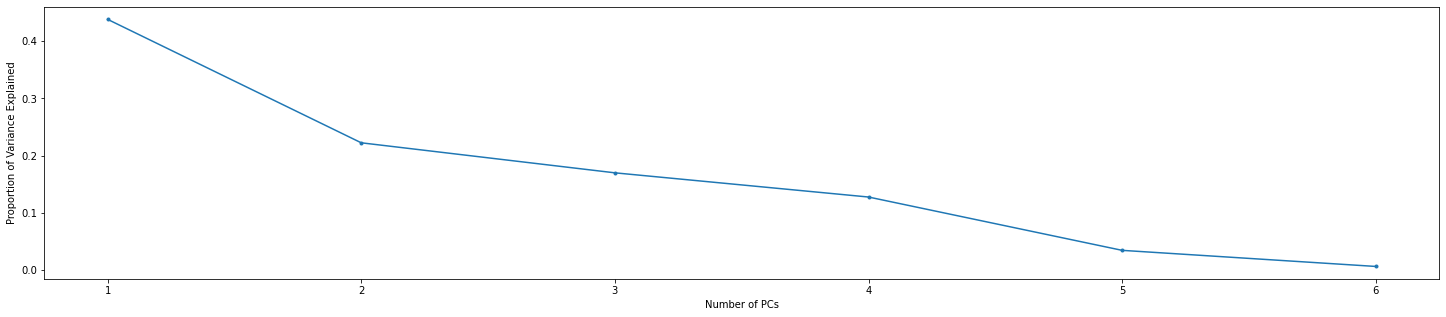

In [74]:
plt.figure(figsize = (25,5))
plt.plot(range(1,7,1),expl_var,marker='.')
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1,7,1))
plt.show()

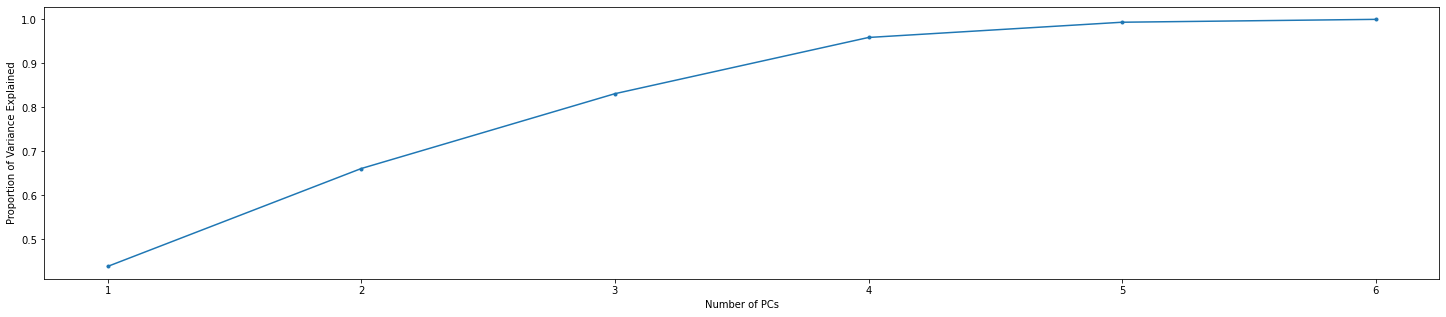

In [75]:
plt.figure(figsize = (25,5))
plt.plot(range(1,7),expl_var_cumulative,marker='.')
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1,7,1))
plt.show()

In [76]:
my_pca = PCA(n_components = 0.99)

# 2. Fit (mathematical calculations are made at this step) 
my_pca.fit(X_train)

# 3. Transform
X_PCA = my_pca.transform(X_train)
n_components = my_pca.n_components_

In [77]:
print(n_components)

5


So I observed that PCA did give me results as I expected initially.   
Hence, I am not going to use PCA in my pipeline, as it is not adding any additional value to my model.

**For Selecting Models:**

I want interpretebility of my models, I am not dealing with large number of features and I have already vetted my features for collinearity I am going to plan my pipeline as below:

1. `Logistic Regression`
    1. Solver used 'saga'(‘saga’ is faster for large datasets)
    2. Regularisation parameter C
2. `Decision Tree`
    1. Max_Depths = 1,2,3,4,5
3. `SVM (Support Vector Machine)`
    1. Regularisation parameter C

`SVM` - The goal of an SVM is to find the boundary which is in the middle of the two classes, maximizing the distance between the decision boundary and the closest points from the training data called the margin.

`Logistic Regression` - Logistic Regression takes a probabilistic approach and aims to maximise the likelihood of the training data given the parameters.

`Decision trees` - Decision trees,are able to compose simple single-feature classifiers in a hierarchal way, where each one deals with a subset of the data. Hence we get tree plot for each decision made at a node.


For Scaling I am going to use `MinMaxScaler()` and `StandardScaler()` 


**Now as I had mentioned earlier, my target is severely imbalanced.  
I am going to run my pipeline on an imbalanced dataset. I am expecting a result that will favour majority class.**

In [243]:
estimators = [('normalize', MinMaxScaler()),
              ('model', LogisticRegression())  # Listing all the steps for pipeline to follow
              ]
              

pipe = Pipeline(estimators)

param_grid = [  {'normalize':[MinMaxScaler(), StandardScaler(), None],  # Listing all hyperparameters for all the models I want to run
                 'model': [LogisticRegression(solver = 'saga')],                         
                 'model__C': [0.001, 0.01, 0.1, 1, 10, 100]},
                {'normalize':[None],
                 'model': [DecisionTreeClassifier()],                        
                 'model__max_depth': [1,2,3,4,5]},
                {'normalize':[MinMaxScaler(), StandardScaler(), None],                 
                 'model': [SVC(probability = True)],                         
                 'model__C': [0.001, 0.01, 0.1, 1, 10, 100]}
                ]
    
             
             
grid = GridSearchCV(pipe, param_grid, cv=5) # Instantiate the Grid Search

fittedgrid = grid.fit(X_train, y_train)

In [244]:
print(fittedgrid.score(X_train, y_train)) # get the score on train and validation set
print(fittedgrid.score(X_validation, y_validation))

0.8525902283329241
0.8526581118240146


So as expected, I see high train and test scores.  
But I am interested in finding recall and precision score as I am dealing with severely imbalanced target value.

In [245]:
fittedgrid.best_estimator_

Pipeline(steps=[('normalize', StandardScaler()),
                ('model', LogisticRegression(C=0.001, solver='saga'))])

#### Best Model: LogisticRegression with regularization C of 0.001 scaled with StandardScaler

In [246]:
fittedgrid.cv_results_['mean_test_score'].shape # there were 41 different combinations checked

(41,)

### Confusion Matrix

**High Recall and High Precision at a glance for positive Class 1: (Source: TowardsDataScience Blog)**

1. high recall + high precision : the class is perfectly handled by the model (FN < TP and TP > FP)
2. low recall + high precision : the model can’t detect the class well but is highly trustable when it does (FN > TP and TP >FP)
3. high recall + low precision : the class is well detected but the model also include points of other classes in it (FN < TP, TP < FP)
4. low recall + low precision : the class is poorly handled by the model ( FN > TP and TP < FP)

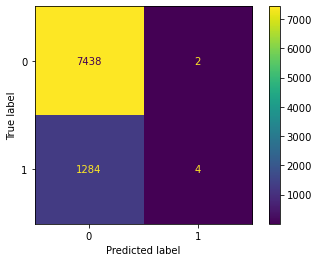

In [248]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get class predictions
y_pred = fittedgrid.predict(X_validation)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_validation, y_pred)

# Plot
ConfusionMatrixDisplay(cf_matrix).plot()
plt.show()

These numbers are exactly what we had in the table above.

|     |  Predicted Less than 7 Ratings  |   Predicted more than 7 greater than Ratings | 
| --------- |:---:|:---:|
|True Less than 7 Ratings |7438 | 2 | 
|True Greater than 7 Ratings |1284|4 | 

In [249]:
from sklearn.metrics import classification_report

report_initial = classification_report(y_validation, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      7440
           1       0.67      0.00      0.01      1288

    accuracy                           0.85      8728
   macro avg       0.76      0.50      0.46      8728
weighted avg       0.83      0.85      0.79      8728



For Class 1 for Good Ratings (ratings greater than 7)  

**Recall** = This means that the model is not classifying the class efficiently. It is predicting more False Negatives than True Positives.  
**Precision** = This means that model is predicting almost equal True Positives and False Positives.

So in our case, model is misclassifying good ratings (ratings greater than 7)  as poor ratings (ratings less than 7), but when it does detect a good rating, it is moderately likely that it is true good rating.

I also wanted to calculate ROC curve to check how good my model to distiguish between 2 classes under different threshold conditions.

In [250]:
from sklearn.metrics import roc_curve, roc_auc_score

y_train_proba = fittedgrid.predict_proba(X_train)[:,1]
y_validation_proba = fittedgrid.predict_proba(X_validation)[:,1]

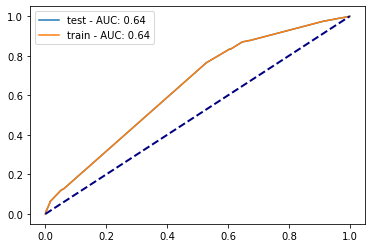

In [251]:
test_fpr, test_tpr, thresholds =  roc_curve(y_validation, y_validation_proba)
train_fpr, train_tpr, thresholds =  roc_curve(y_validation, y_validation_proba)

test_auc_score = round(roc_auc_score(y_validation, y_validation_proba), 2)
train_auc_score = round(roc_auc_score(y_validation, y_validation_proba), 2)

plt.figure()
plt.plot(test_fpr, test_tpr, label=f"test - AUC: {test_auc_score}")
plt.plot(train_fpr, train_tpr, label=f"train - AUC: {train_auc_score}")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend()
plt.show()

I can see that my model is 64% sure of classifying between Class 0 and Class 1

As my class is imbalance, I tried Oversampling and UnderSampling methods (Please refer to Notebook 3 to see comparison and results between Oversampling and Undersampling) to balance my target value and analyze results.  
I saw that Oversampling using SMOTE from imbalance learn library and RandomUnderSampling from imbalance learn library gave me a very similar results to each other.  
I also learned that Oversampling took a long time to run.  
Hence, I chose to use Undersampling as my result was not compromised and it ran faster than Oversampling method.

Though accuracy of model is very important my focus is on precision and recall scores.

**I have a more information about what type of Oversampling and Undersampling methods I chose in my Notebook 3**

### Please read Notebook 3 `Capstone_ML_Imbalance_Learn` before continuing ahead

## Under Sampling

In [252]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled1, y_resampled1 = rus.fit_resample(X_train, y_train)

In [253]:
y_resampled1.value_counts()

0    3005
1    3005
Name: weighted_average_vote, dtype: int64

In [254]:
estimators2 = [('normalize', MinMaxScaler()),
               ('model', LogisticRegression(max_iter = 3000))]
             
              

pipe2 = Pipeline(estimators2)

param_grid2 = [ {'normalize':[MinMaxScaler(), StandardScaler(), None],
                 'model': [LogisticRegression(solver = 'saga')],                         
                 'model__C': [0.001, 0.01, 0.1, 1, 10, 100]},
                {'normalize':[None],
                 'model': [DecisionTreeClassifier()],                         
                 'model__max_depth': [1,2,3,4,5]},
                {'normalize':[MinMaxScaler(), StandardScaler(), None],                 
                 'model': [SVC(probability = True)],                         
                 'model__C': [0.001, 0.01, 0.1, 1, 10, 100]}]                
    
             
             
grid2 = GridSearchCV(pipe2, param_grid2, cv=5)

fittedgrid2 = grid2.fit(X_resampled1, y_resampled1)

In [255]:
print(fittedgrid2.score(X_resampled1, y_resampled1))
print(fittedgrid2.score(X_validation, y_validation))

0.6141430948419301
0.46081576535288726


My accuracy has dropped significantly.
My train scores on a balanced data is 61%.
My test scores on an unseen imbalanced data is 46%
This shows that the model is not overfitting.
I am going to investigate more into confusion matrix.

In [256]:
fittedgrid2.best_estimator_

Pipeline(steps=[('normalize', None),
                ('model', DecisionTreeClassifier(max_depth=3))])

#### Best Model: Decision Tree with max_depth = 3 and is not scaled

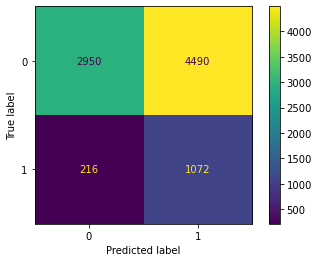

In [257]:
# Get class predictions
y_pred = fittedgrid2.predict(X_validation)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_validation, y_pred)

# Plot
ConfusionMatrixDisplay(cf_matrix).plot()
plt.show()

These numbers are exactly what we had in the table above.

|     |  Predicted Less than 7 Ratings  |   Predicted more than 7 greater than Ratings | 
| --------- |:---:|:---:|
|True Less than 7 Ratings |2950 | 4490 | 
|True Greater than 7 Ratings |216|1072 | 

In [258]:
report_initial = classification_report(y_validation, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.93      0.40      0.56      7440
           1       0.19      0.83      0.31      1288

    accuracy                           0.46      8728
   macro avg       0.56      0.61      0.43      8728
weighted avg       0.82      0.46      0.52      8728



For Class 1 for Good Ratings (ratings greater than 7)  

**Recall** = This means that the model is classifying the class very efficiently. It is predicting less False Negatives than True Positives.  
**Precision** = This means that model is predicting very less True Positives predicting more False Positives.

So, in our case, it does a good job classifying ratings into good and bad very well, but when it does detect we are not sure if it is indeed a good rating, it is highly likely that it is truly a poor rating.

In [259]:
from sklearn.metrics import roc_curve, roc_auc_score

y_resampled1_proba = fittedgrid2.predict_proba(X_resampled1)[:,1] # Calculate probability to check ROC
y_validation_proba = fittedgrid2.predict_proba(X_validation)[:,1]

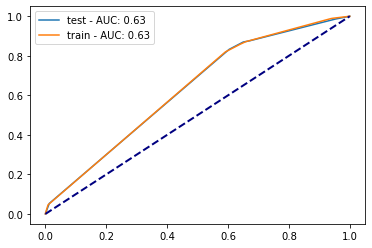

In [260]:
test_fpr, test_tpr, thresholds =  roc_curve(y_validation, y_validation_proba) # Cakculate fpr and tpr scores
train_fpr, train_tpr, thresholds =  roc_curve(y_resampled1, y_resampled1_proba)

test_auc_score = round(roc_auc_score(y_validation, y_validation_proba), 2)
train_auc_score = round(roc_auc_score(y_resampled1, y_resampled1_proba), 2)

plt.figure()
plt.plot(test_fpr, test_tpr, label=f"test - AUC: {test_auc_score}")
plt.plot(train_fpr, train_tpr, label=f"train - AUC: {train_auc_score}")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend()
plt.show()

I can see that my model is still 63% sure of classifying between Class 0 and Class 1.   
It has not improved or regressed significantly.

## Prediction vs True Ratings

#### I wanted to fit in the complete dataset and see how my model predicts against true ratings.

In [114]:
Predicted = fittedgrid2.predict(X1) # Full dataset

In [98]:
Proba = fittedgrid2.predict_proba(X1)[:,1] # probability for class 1

In [100]:
New = pd.DataFrame(data=Predicted, columns=["Predicted_Value"]) # convert tp dataframe

In [101]:
New.head()

,Predicted_Value
0,1
1,0
2,0
3,1
4,0


In [102]:
New['Predicted_Value'].value_counts() 

1    18527
0    10566
Name: Predicted_Value, dtype: int64

For Class 1 as we know that our True Ratings class counts is:  

`Class 0:`    **24800**  

`Class 1:`     **4293**

For Class 1 Predicted Value class counts is:

`Class 0:`     **10566**  

`Class 1:`     **18527**

**This indicates model's low precision rate**

In [103]:
New1 = pd.DataFrame(data=Proba, columns=["Probability for Class 1"]) # convert to dataframe

In [104]:
New1.head()

,Probability for Class 1
0,0.544509
1,0.378678
2,0.378678
3,0.544509
4,0.378678


In [115]:
data = pd.concat([world_df, New, New1], axis = 1) 
# Concat this predicted value and probability with original dataframe 'world_df'

In [106]:
data.head()

,imdb_title_id,original_title,date_published,genre,duration,country,language,director,actors,votes,...,mean_vote,weighted_us_voters_rating,weighted_non_us_voters_rating,weighted_males_allages_rating,weighted_females_allages_rating,popular_actor,popular_director,popular_genre,Predicted_Value,Probability for Class 1
0,tt0069049,The Other Side of the Wind,2018-11-02,Drama,122,USA,Other,Orson Welles,"John Huston, Oja Kodar, Peter Bogdanovich, Sus...",5887,...,6.8,6.474287,6.414612,6.609705,6.042891,0,0,1,1,0.544509
1,tt0100275,La Telenovela Errante,2018-09-06,"Comedy, Drama, Fantasy",80,Other,Other,"Raoul Ruiz, Valeria Sarmiento","Luis Alarcón, Patricia Rivadeneira, Francisco ...",260,...,6.6,5.917986,5.799475,5.921459,6.005447,0,0,1,0,0.378678
2,tt0137204,Joe Finds Grace,2018-03-20,"Animation, Adventure, Comedy",83,Other,English,Anthony Harrison,"Anthony Harrison, C. Ernst Harth, Ellie Harvie...",264,...,8.9,6.312544,5.858175,6.163796,6.214925,0,0,1,0,0.378678
3,tt0146592,Pál Adrienn,2011-03-17,Drama,136,Other,Other,Ágnes Kocsis,"Éva Gábor, István Znamenák, Ákos Horváth, Lia ...",470,...,6.9,5.896524,5.968471,5.994856,6.070738,0,0,1,1,0.544509
4,tt0162942,A zöld sárkány gyermekei,2011-04-07,Drama,89,Other,Other,Bence Miklauzic,"Zoltán Rátóti, Yu Debin, Eszter Bánfalvi, Fere...",128,...,7.1,5.902393,5.794009,5.891751,6.010284,0,0,1,0,0.378678


In [120]:
# Keep only few coulmns to see how actual weighted_average_vote and predicted value and probability compares

data1 = data[['imdb_title_id','original_title', 'genre','weighted_average_vote','Predicted_Value','Probability for Class 1']]

In [121]:
data1.head()

,imdb_title_id,original_title,genre,weighted_average_vote,Predicted_Value,Probability for Class 1
0,tt0069049,The Other Side of the Wind,Drama,6.8,1,0.544509
1,tt0100275,La Telenovela Errante,"Comedy, Drama, Fantasy",6.6,0,0.378678
2,tt0137204,Joe Finds Grace,"Animation, Adventure, Comedy",8.8,0,0.378678
3,tt0146592,Pál Adrienn,Drama,6.7,1,0.544509
4,tt0162942,A zöld sárkány gyermekei,Drama,6.8,0,0.378678


In [122]:
# Sort by weighted_average_vote

m = data1.sort_values(by ='weighted_average_vote', ascending = False )
m.head()

,imdb_title_id,original_title,genre,weighted_average_vote,Predicted_Value,Probability for Class 1
26551,tt7822474,Suvarna Sundari,"Action, Thriller",9.9,1,0.544509
28253,tt9008642,Notuku Potu,"Horror, Mystery",9.8,0,0.447168
1548,tt11976170,Jeeudo,"Drama, Romance",9.8,1,0.544509
2981,tt1508669,Hopeful Notes,Drama,9.7,1,0.549066
1858,tt12747588,Meka Suri,"Crime, Thriller",9.7,0,0.378678


In [123]:
# Filter ratings greater than 7

m[m['weighted_average_vote'] > 7].head(20)

,imdb_title_id,original_title,genre,weighted_average_vote,Predicted_Value,Probability for Class 1
26551,tt7822474,Suvarna Sundari,"Action, Thriller",9.9,1,0.544509
28253,tt9008642,Notuku Potu,"Horror, Mystery",9.8,0,0.447168
1548,tt11976170,Jeeudo,"Drama, Romance",9.8,1,0.544509
2981,tt1508669,Hopeful Notes,Drama,9.7,1,0.549066
1858,tt12747588,Meka Suri,"Crime, Thriller",9.7,0,0.378678
27696,tt8571428,Vaarthakal Ithuvare,Comedy,9.7,1,0.544509
1211,tt11164090,The Moving on Phase,Comedy,9.5,0,0.378678
11858,tt2673212,The Best Years,"Comedy, Crime, Drama",9.4,1,0.544509
24429,tt6735740,Love in Kilnerry,Comedy,9.3,1,0.544509
495,tt10218912,As I Am,"Drama, Fantasy, Romance",9.3,0,0.409311


In [111]:
m['Predicted_Value'].head(20).value_counts() # proves my higher recall for Class 1

1    15
0     5
Name: Predicted_Value, dtype: int64

#### I am going to download csv to use for Oversampling and Undersampling in notebook 3

In [76]:
X1.to_csv(r'Created_Data\Features.csv', index = False)
y1.to_csv(r'Created_Data\Target.csv', index = False)

# ---------------------------END of NOTEBOOK.....................................................